# Load MNIST and show montage

In [1]:
import numpy as np #basic python
import matplotlib.pyplot as plt #for plots
import torch
from torchvision import datasets #get the datasets to use
from skimage.util import montage # to show montage of the images
from skimage.io import imread

In [ ]:
#defintions

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [3]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [4]:
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

100%|██████████| 18165135/18165135 [00:10<00:00, 1760554.87it/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 338303.78it/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:01<00:00, 1543738.97it/s]


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 22276801.33it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



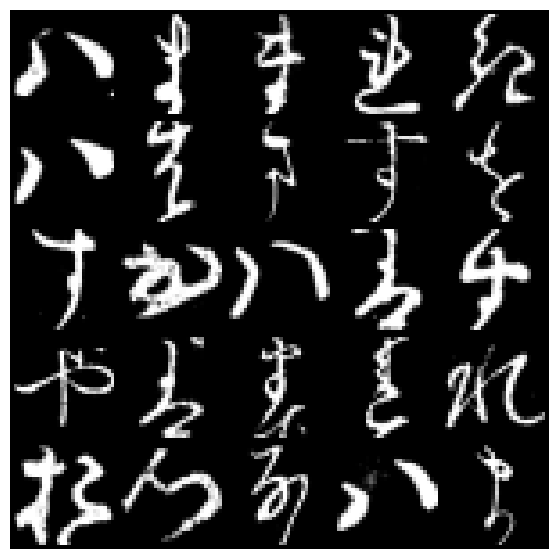

In [5]:
# train_set is to be a PyTorch dataset containing training data.
# .data extracts the data portion from the dataset.
# .numpy() converts the data from a PyTorch tensor to a NumPy array.
# X is assigned this NumPy array, contains the training images.
X = train_set.data.numpy()

# test_set is to be a PyTorch dataset containing test data.
# .data extracts the data portion from the test dataset.
# .numpy() converts the data from a PyTorch tensor to a NumPy array.
# X_test is assigned this NumPy array, which likely contains the test images.
X_test = test_set.data.numpy()

# train_set is to be a PyTorch dataset containing training data.
# .targets extracts the target labels from the training dataset.
# .numpy() converts the target labels from a PyTorch tensor to a NumPy array.
# Y is assigned this NumPy array, which likely contains the labels for the training data.
Y = train_set.targets.numpy()

# test_set is assumed to be a PyTorch dataset containing test data.
# .targets extracts the target labels from the test dataset.
# .numpy() converts the target labels from a PyTorch tensor to a NumPy array.
# Y_test is assigned this NumPy array, which likely contains the labels for the test data.
Y_test = test_set.targets.numpy()

#  adds an extra dimension to the X array at index 1 (i.e., it adds a channel dimension).
# This is typically done for compatibility with convolutional neural networks (CNNs) which\
# expect input data in the format [batch_size, channels, height, width].
X = X[:,None,:,:]/255

X_test = X_test[:,None,:,:]/255
X.shape
montage_plot(X[125:150,0,:,:]) # this actually plots it

In [6]:
## Run random y=mx model on MNIST
 #Reshape image data tensor from (60000, 1, 28, 28) to (60000, 784)
X = X.reshape(X.shape[0],784)

 #Reshape image test data tensor from (60000, 1, 28, 28) to (60000, 784)
X_test = X_test.reshape(X_test.shape[0],784)
X.shape

(60000, 784)

In [7]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [8]:
X.shape

torch.Size([60000, 784])

In [9]:
X = X.T

In [11]:
X.shape

torch.Size([784, 60000])

# Run random y=mx model on MNIST

In [12]:
x = X[:,0:1]
x.shape
M = GPU(np.random.rand(10,784))

# This line performs matrix multiplication between M and x.
# It's essentially a linear transformation where M acts as weights and x is the input.
# The result is assigned to the variable y.
y = M@x

batch_size = 64

x = X[:,0:batch_size]

# Similar to line 3, this line initializes a new random matrix M with the same dimensions
M = GPU(np.random.rand(10,784))

y = M@x

y = torch.argmax(y,0)

torch.sum((y == Y[0:batch_size]))/batch_size


tensor(0.1094, device='cuda:0')

# Train random walk model


In [14]:
m_best = 0 # best weight matrix found during the search
acc_best = 0 # best accuracy achieved during the search

for i in range(100000): # Start a loop that will run 100,000 iterations

    step = 0.0000000001 # Define a small step size that will be used to update the m_best matrix in each iteration. It's a small value, likely for fine-grained adjustments

    m_random = GPU_data(np.random.randn(10,784)) # Define a small step size that will be used to update the m_best matrix in each iteration. It's a small value, likely for fine-grained adjustments

    m = m_best  + step*m_random # Update the weight matrix m by adding a small step (step) times the random matrix (m_random) to the current m_best. This is part of the random search process, exploring different weight matrices.

    y = m@X

    # Calculate the maximum value along the 0th axis (likely representing different classes or predictions) using PyTorch's argmax function. This is done to determine the predicted class for each input.
    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

0.13091666996479034
0.13490000367164612
0.17133332788944244
0.17615000903606415
0.18611666560173035
0.1899999976158142
0.1939166635274887
0.2032500058412552
0.20848333835601807
0.21401667594909668
0.21960000693798065
0.22313334047794342
0.22603332996368408
0.23026667535305023
0.24663333594799042
0.2477833330631256
0.2498166710138321
0.2508833408355713
0.250983327627182
0.25298333168029785
0.25786668062210083
0.25893333554267883
0.26179999113082886
0.2621166706085205
0.26411667466163635
0.26536667346954346
0.2720000147819519
0.2720666825771332
0.27300000190734863
0.27603334188461304
0.27869999408721924
0.27978333830833435
0.28325000405311584
0.28896665573120117
0.2903333306312561
0.2906833291053772
0.29330000281333923
0.29421666264533997
0.295199990272522
0.2986166775226593
0.29926666617393494
0.2994999885559082
0.30114999413490295
0.30221667885780334
0.30266666412353516
0.30871668457984924
0.31029999256134033
0.31406667828559875
0.3154166638851166
0.3167000114917755
0.3203166723251343


KeyboardInterrupt: ignored